### 1. Даны функции для сортировки массивов, которые работают за O(N^2): Пузырек и сортировка выбором, эмпирически определить, какая реализация быстрее и как зависит разница времени исполнения одного и другого от длины входного массива


Как решать:

    1) Генерируем случайный список чисел длины N и его точную копию

    2) Сортируем первый пузырьком, второй - выбором, в обоих случаях засекаем время

    3) Записываем время сортировки при длине N в списки.

    4) Получаем зависимость разницы времени исполнения от длины

    5) Готово, вы восхитительны.

Чтобы повысить точность, для каждого N можно сгенерировать случайный список несколько раз и усреднить время.

In [1]:
def bubble_sort(nums):

    # Устанавливаем swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True

    while swapped:
        swapped = False

        # Идем циклом по индексам наших элементов
        for i in range(len(nums) - 1):
#             print(nums)
            # Если текущий элемент слева больше своего элемента справа
            if nums[i] > nums[i + 1]:

                # Меняем элементы местами
                nums[i], nums[i + 1] = nums[i + 1], nums[i]

                # Устанавливаем swapped в True для следующей итерации
                swapped = True

                # По окончании первого прогона цикла for
                # самый большой элемент "Всплывет" наверх
                
                
def selection_sort(nums):

    # Значение i соответствует кол-ву отсортированных значений
    for i in range(len(nums)):

        # Исходно считаем наименьшим первый элемент
        lowest_value_index = i

        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j

        # Самый маленький элемент меняем с первым в списке
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]



In [2]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

def measure_time_sort_list(list_num_for_sort, sort_method):
   '''
   Функция получает на вход список для сортировки и метод сортировки
   возвращает время сортировки
   '''
   start_time = time.time() # время начала выполнения
   sort_method(list_num_for_sort) # сортировка
   end_time = time.time() # время окончания выполнения
   execution_time = end_time - start_time # время выполнения сортировки
   return round(execution_time, 5)

In [3]:
# Определение среднего времени сортровки (выполняется около 8 сек)
list_bubble = list()
list_selection = list()
for i in range(100):
    '''
    В цикле 100 раз создается список длиной 1000 и вычисляется время сортировки
    '''
    random_for_bubble = random.sample(range(10000), 1000)
    random_for_selection = random_for_bubble.copy()
    list_bubble.append(measure_time_sort_list(random_for_bubble, bubble_sort))
    list_selection.append(measure_time_sort_list(random_for_selection, selection_sort))
    
print(f'Среднее время сортировки ПУЗЫРЬКОМ: {sum(list_bubble)/len(list_bubble)} сек.')
print(f'Среднее время сортировки ВЫБОРОМ: {sum(list_selection)/len(list_selection)} сек.')

Среднее время сортировки ПУЗЫРЬКОМ: 0.0637381 сек.
Среднее время сортировки ВЫБОРОМ: 0.0178265 сек.


In [4]:
# списки времени выполнения сортировки (выполняется около 22 сек)
list_time_bubble = list()
list_time_selection = list()

range_gen = range(10, 2001, 10) # параметр для создания 200 списков длиной от 10 до 2000
list_len_lists = list(range_gen) # список длин списков

for i in range_gen:
   '''
   В цикле генерируются списки по параметру range_gen со значениями от 0 до 19999,
   значения длин сгенерированных списков, затем вычисляется время сортировки каждым методом
   и передается в соответствующий список
   '''
   random_list_for_bubble = random.sample(range(10000), i)
   random_list_for_selection = random_list_for_bubble.copy()

   list_time_bubble.append(measure_time_sort_list(random_list_for_bubble, bubble_sort))
   list_time_selection.append(measure_time_sort_list(random_list_for_selection, selection_sort))

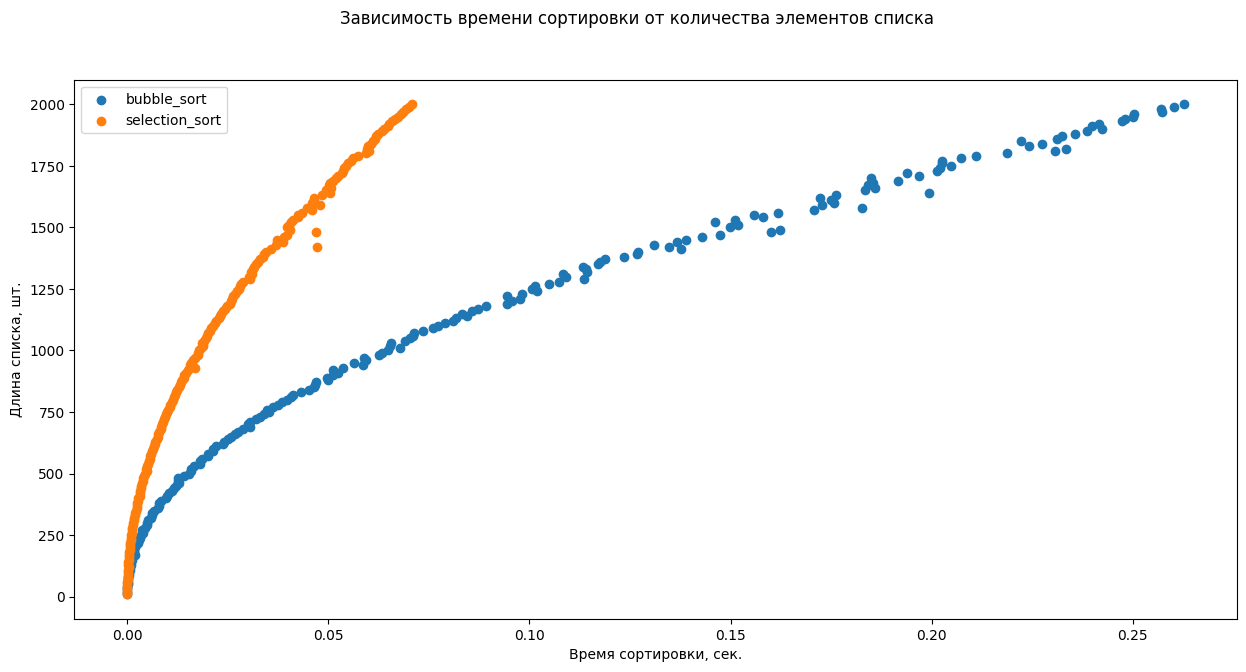

In [5]:
plt.subplots(1, 1, figsize=(15, 7))
plt.suptitle('Зависимость времени сортировки от количества элементов списка')
plt.scatter(list_time_bubble, list_len_lists, label= bubble_sort.__name__)
plt.scatter(list_time_selection, list_len_lists, label= selection_sort.__name__)
plt.ylabel('Длина списка, шт.')
plt.xlabel('Время сортировки, сек.')
plt.legend();

### 2. [Алгоритм имитации отжига](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)

Прочтите статью про алгоритм имитации отжига (я сдернул информацию по ссылке), это простейший не-градиентный алгоритм оптимизации функций(поиска экстремума)


**Задание 1**

Проверьте, как зависит скорость сходимости алгоритма для целевой функии вида $y = x^2$ от:

1) начальной температуры

2) размера шага алгоритма (попробуйте подомножать результаты randn на число и заменить нормальное распределение на равномерное)


**Задание 2**

Попробовать желательно, но не обязательно.

Модифицируйте алгоритм так чтобы он работал для квадратичной функции от двух переменных $x^2 + y^2$ и , если возможно, от n переменных.

In [74]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import uniform
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x):
    return x[0]**2.0

def simulated_annealing(objective, bounds, n_iterations, step_size, temp, num=1):
    # generate an initial point
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = list()
    iterations = list()
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + randn(len(bounds)) * num * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            scores.append(best_eval)
            iterations.append(i)
            # report progress

        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores, iterations]

In [116]:
# функция определяет равномерное распределение для candidate
def simulated_annealing_uniform(objective, bounds, n_iterations, step_size, temp, num=1):
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    scores = list()
    iterations = list()
    for i in range(n_iterations):
        candidate = curr + uniform(len(bounds)) * num * step_size
        candidate_eval = objective(candidate)
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            scores.append(best_eval)
            iterations.append(i)
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores, iterations]

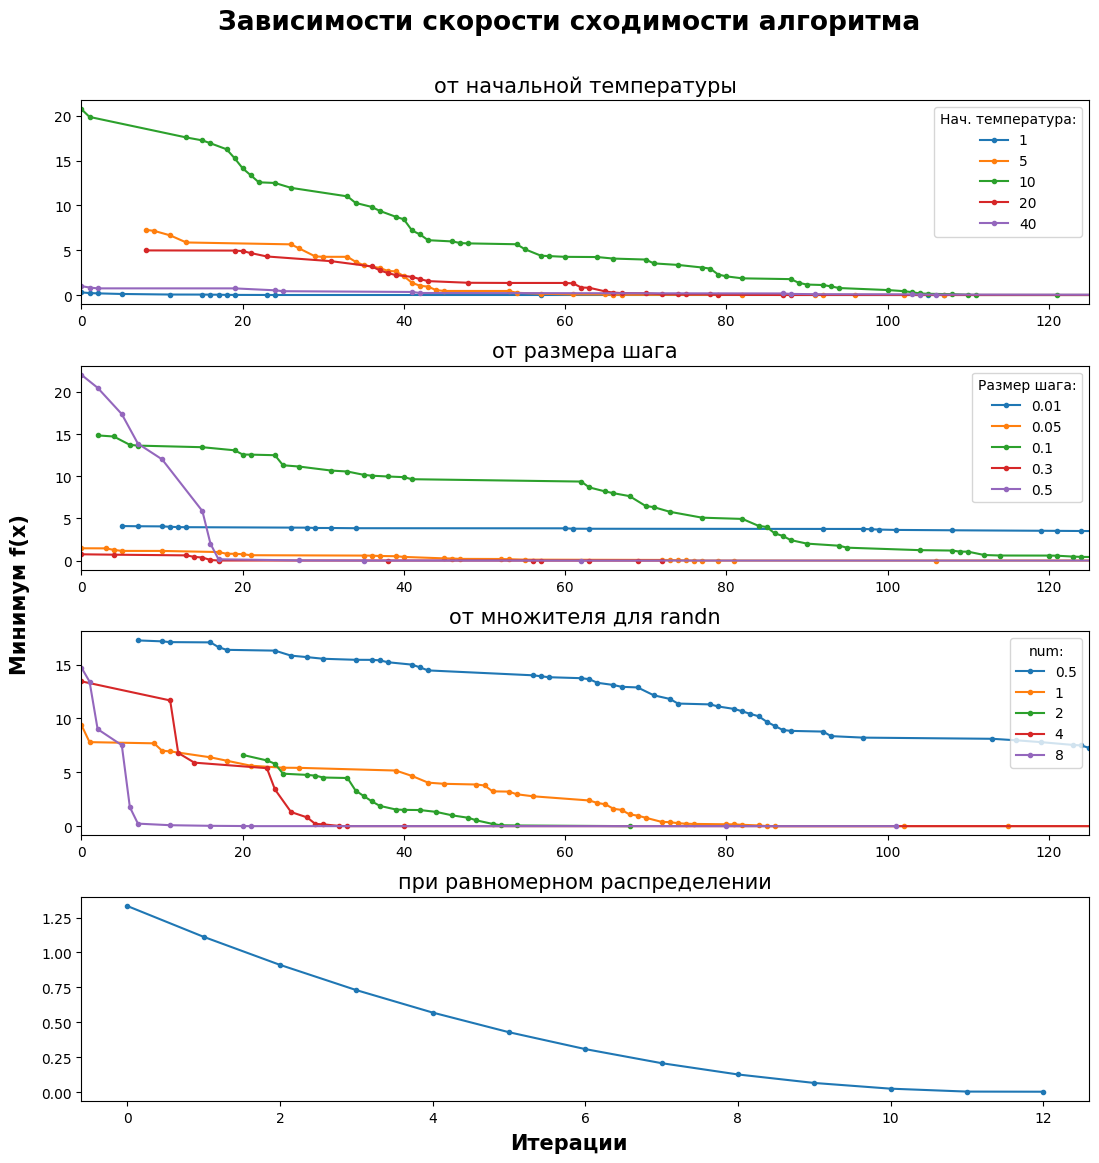

In [115]:
def measure_value_func(objective, bounds, n_iterations):
    
    '''
    Функция принимает на вход целевую функцию, область ее определения и количество итераций 
    Возвращает графики зависимостей скорости сходимости алгоритма от:
    * начальной температуры
    * размера шага
    * число num на которое умножается предпологаемый минимум целевой функции
    * установки равномерного распределения вместо нормального
    '''

    seed(42)
    list_temperature = [1, 5, 10, 20, 40]
    list_step_size = [0.01, 0.05, 0.1, 0.3, 0.5]
    list_num_for_rndn = [0.5, 1, 2, 4, 8]

    fig, ax = plt.subplots(4, 1, figsize= [13, 13])
    fig.supxlabel('Итерации', fontsize= 15, fontweight= 'bold', y= 0.07)
    fig.supylabel('Минимум f(x)', fontsize= 15, fontweight= 'bold', x= 0.07)
    fig.suptitle('Зависимости скорости сходимости алгоритма', fontsize= 19, fontweight= 'bold', y= 0.95)
    
    ax[0].set_title('от начальной температуры', fontsize= 15)
    ax[0].set_xlim([0, 125])

    ax[1].set_title('от размера шага', fontsize= 15)
    ax[1].set_xlim([0, 125])
    
    ax[2].set_title('от множителя для randn', fontsize= 15)
    ax[2].set_xlim([0, 125])
    
    # расчет при равномерном распределении для candidate
    ax[3].set_title('при равномерном распределении', fontsize= 15)
    _, _, scores, iterations = simulated_annealing_uniform(objective, bounds, n_iterations, list_step_size[2], list_temperature[2])
    ax[3].plot(iterations, scores, '.-')

    for i in range(len(list_temperature)):

        # расчет с изменением начальной температуры
        _, _, scores, iterations = simulated_annealing(objective, bounds, n_iterations, list_step_size[2], list_temperature[i])
        ax[0].plot(iterations, scores, '.-', label= list_temperature[i])
        ax[0].legend(title= 'Нач. температура:', loc=1)

        # расчет с изменением размера шага 
        _, _, scores, iterations = simulated_annealing(objective, bounds, n_iterations, list_step_size[i], list_temperature[2])
        ax[1].plot(iterations, scores, '.-', label= list_step_size[i])
        ax[1].legend(title= 'Размер шага:', loc= 1)

        # расчет с изменением num
        _, _, scores, iterations = simulated_annealing(objective, bounds, n_iterations, list_step_size[2], list_temperature[2], list_num_for_rndn[i])
        ax[2].plot(iterations, scores, '.-', label= list_num_for_rndn[i])
        ax[2].legend(title= 'num:', loc=1)

    plt.subplots_adjust(hspace= 0.3)
    plt.show()

measure_value_func(objective, asarray([[-5.0, 5.0]]), 1000)

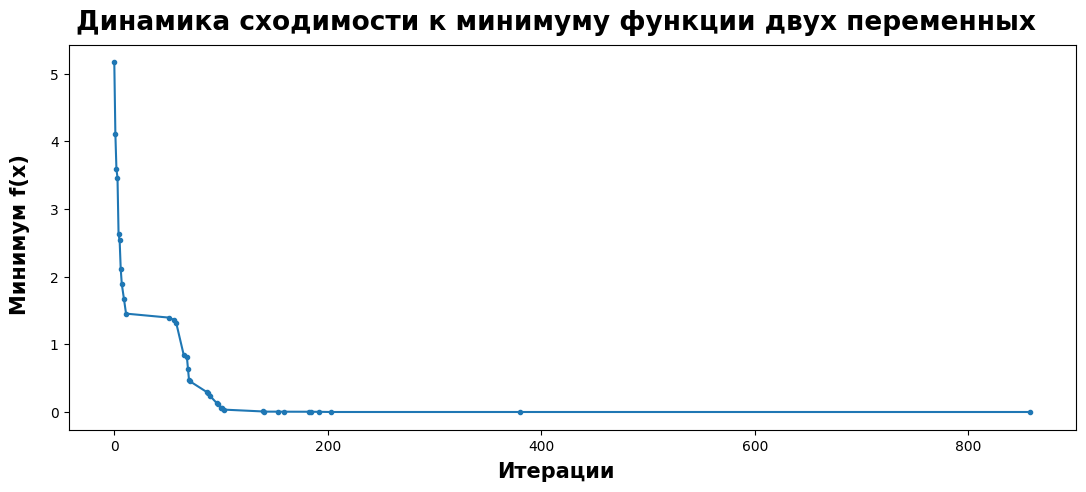

In [153]:
# нахождения минимума функции двух переменных
def objective(x, y):
    return x[0]**2.0 + y[0]**2

def simulated_annealing_two_variables(objective, bounds, n_iterations, step_size, temp, num=1):
    seed(1)
    best_x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_y = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = objective(best_x, best_y)
    curr_x, curr_y, curr_eval = best_x, best_y, best_eval
    scores, iterations  = list(), list()
    for i in range(n_iterations):
        candidate_x = curr_x + randn(len(bounds)) * num * step_size
        candidate_y = curr_y + randn(len(bounds)) * num * step_size
        candidate_eval = objective(candidate_x, candidate_y)
        if candidate_eval < best_eval:
            best_x, best_y, best_eval = candidate_x, candidate_y, candidate_eval
            scores.append(best_eval)
            iterations.append(i)
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr_x, curr_y, curr_eval = candidate_x, candidate_y, candidate_eval
    return [best_x, best_y, best_eval, scores, iterations]

_, _, _, scores, iterations = simulated_annealing_two_variables(objective, asarray([[-5.0, 5.0]]), 1000, 0.1, 10)

fig, ax = plt.subplots(1, 1, figsize= [13, 5])
fig.supxlabel('Итерации', fontsize= 15, fontweight= 'bold', y= 0.005)
fig.supylabel('Минимум f(x)', fontsize= 15, fontweight= 'bold', x= 0.08)
fig.suptitle('Динамика сходимости к минимуму функции двух переменных', fontsize= 19, fontweight= 'bold', y= 0.95)
ax.plot(iterations, scores, '.-');

### 3. Подсчет слов
Давайте теперь поработаем с настоящим файлом и действительно посчитаем в нем слова. Мы загрузим метаданные почтового сервера университета Мичигана. И попробуем **найти, с какого адреса ушло больше всего писем.**

In [8]:
# импортируем библиотеку для доступа к файлам в интернете
import requests
import re
# в переменной mbox хранится текст для работы
mbox = requests.get('http://www.py4inf.com/code/mbox.txt').text

In [9]:
def count_emails(log_text, mode='email_max_count'):

    '''
    функция получает на вход лог почтового сервера в виде str и переменную определяющую, что возвращает функция:
    mode = 'email_max_count' - список хранящий адрес с которого ушло максимум писем и количество отправлений (по умолчанию)
    mode = 'error_operation' - в этом режиме функция вернет данные, которые не удалось обработать 
    '''

    log_text = mbox.split('\n----------------------\n') # нарезаю текст на список текстов с информацией об одном отправлении письма
    dict_emails = dict()
    list_error = []
    for i in log_text: # цикл бежит по списку текстов 
        email_in_mail = re.search('From ([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', i) # регулярка для нахождения email отправителя в логе
        if email_in_mail != None: # проверяем, что удалось найти email отправителя в логе
            if email_in_mail.group()[5:] not in dict_emails: # это условие формирует словарь с количеством отправлений для каждого уникального email отправителя
                dict_emails[email_in_mail.group()[5:]] = 1
            else:
                dict_emails[email_in_mail.group()[5:]] += 1
        else:
            list_error.append(i) # формирую список текста, где не было обнаружено emails

    dict_res = {'email_max_count': [max(dict_emails, key=dict_emails.get), max(dict_emails.values())], 'error_operation': list_error} # результирующий словарь, в котором формируется инфа исходя из переданного mode
    return dict_res[mode]

print('Режим "email_max_count":', count_emails(mbox))
print('Режим "error_operation":', count_emails(mbox, 'error_operation'))

Режим "email_max_count": ['zqian@umich.edu', 195]
Режим "error_operation": ['This automatic notification message was sent by Sakai Collab (https://collab.sakaiproject.org/portal) from the Source site.\nYou can modify how you receive notifications at My Workspace > Preferences.\n\n\n\n']


### 4. Напишите функцию, которая переводит число, записанное римскими цифрами, в десятичное

Символы для римских цифр:

    I             1
    V             5
    X             10
    L             50
    C             100
    D             500
    M             1000


Например, 2 записывается как II .

12 записывается как XII, что просто X + II.

Число 27 записывается как XXVII, что равно XX + V + II.

Римские цифры обычно записываются от большего к меньшему слева направо. Однако символы для 4 не IIII. Вместо этого число четыре записывается как IV, потому что если I стоит перед V, мы "вычитаем его", получая тем самым четыре. Тот же принцип работает и для числа девять, которое записывается как IX. Существует шесть случаев, когда используется вычитание:

    I может быть помещен перед V (5) и X (10) для получения 4 и 9.
    X может быть помещен перед L (50) и C (100) для получения 40 и 90.
    C может быть помещен перед D (500) и M (1000), чтобы получить 400 и 900.

In [10]:
def rewrite_roman_num(input_roman_num):
    '''
    функция получает на вход римское число в виде строки
    возвращает десятичное число типа int
    '''
    roma_nums = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    last_num = input_roman_num[-1]
    dec_num = roma_nums[last_num]

    for i in input_roman_num[-2::-1]:
        if roma_nums[i] >= roma_nums[last_num]:
            dec_num += roma_nums[i]
        else:
            dec_num -= roma_nums[i]
            last_num = i
    return dec_num

rewrite_roman_num('MMM')

3000

### 5. Напишите декоратор, который сначала выводит на печать имя вызываемой функции, затем делает паузу в 3 секунды, а затем вызывает функцию

(Про имя вызываемой функции можно глянуть в лекции - там один из декораторов такое делал)

In [11]:
def debug_decorator(func):
    def wrapper(*args):
        print("- Имя вызываемой функции:", func.__name__)
        print('- Пауза 3 секунды...')
        time.sleep(3)
        result = func(*args)
        print("- Результат вызываемой функции:", result)
    return wrapper

In [12]:
@debug_decorator
def rewrite_roman_num(input_num):
    '''
    функция получает на вход римское число в виде строки
    возвращает десятичное число типа int
    '''
    roma_nums = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    last_num = input_num[-1]
    dec_num = roma_nums[last_num]
    for i in input_num[-2::-1]:
        if roma_nums[i] >= roma_nums[last_num]:
            dec_num += roma_nums[i]
        else:
            dec_num -= roma_nums[i]
            last_num = i
    return dec_num

rewrite_roman_num('XXVII')

- Имя вызываемой функции: rewrite_roman_num
- Пауза 3 секунды...
- Результат вызываемой функции: 27


### 6. Функции ошибок

В целом, машинное обучение часто сводится к минимизации какого-то функционала ошибки. Ваш алгоритм на обучающей выборке возвращает список предсказаний, который вы с помощью какого-то функционала сравниваете с правильными ответами и получаете некое значение (ошибку), которую нужно минимизировать. В этом задании необходимо реализовать ряд функционалов ошибок.


## Пример - MSE

In [13]:
from typing import List
import sys
import math

def mse(prediction:List[float], 
        actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеквадратичную ошибку
    '''
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mse = sum((prediction[i] - actual_values[i])**2 for i in range(N))/N
    
    return mse

In [14]:
a = [1,2,3,4,5]
b = [1,2,3,10,6]

mse(a,b) == (6**2 + 1)/5

True

Аналогичным образом реализуйте следующий список функций ошибок:

    RMSE, LogLoss, HueberLoss, MAE, MAPE, sMAPE, log-cosh loss, quantile loss  :) 

Вопросы можно задавать

In [15]:
def rmse(prediction:List[float],
         actual_values:List[float]) -> float:
        '''
        На вход приходят два списка равной длины
        На выходе мы получаем корень среднеквадратичной ошибки
        '''
        assert len(prediction) == len(actual_values)
        N = len(prediction)
        rmse = (sum((actual_values[i] - prediction[i]) ** 2 for i in range(N)) / N) ** (1/2)
        return rmse

rmse(a, b)

2.7202941017470885

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(b, a) ** (1/2) == rmse(a, b)

True

In [17]:
def logloss(prediction_proba:List[float],
            actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем логарифмическую ошибку бинарной классификации
    '''
    assert len(prediction_proba) == len(actual_values)
    N = len(prediction_proba)
    logloss_value = (sum(-1 * (actual_values[i] * math.log(prediction_proba[i][1]) + (1 - actual_values[i]) * math.log(1 - prediction_proba[i][1])) for i in range(N)) / N)
    return logloss_value

a_class = [1, 0, 0, 1]
a_proba = [[.1, .9], [.9, .1], [.8, .2], [.35, .65]]
logloss(a_proba, a_class)

0.21616187468057912

In [18]:
from sklearn.metrics import log_loss
logloss(a_proba, a_class) == log_loss(a_class, a_proba)

True

In [19]:
def hueber_loss(prediction:List[float],
                actual_values:List[float], delta= 1) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем ошибку Хьюбера при границе разделения равной 1
    Обычно выводят массив ошибок, но конкретно для этого задания я вывел среднюю ошибок Хьюбера
    '''
    assert len(prediction) == len(actual_values)
    N = len(prediction)
    hueber_loss_list = []
    for i in range(N):
        if abs(actual_values[i] - prediction[i]) <= delta:
            hueber_loss_list.append(0.5 * (actual_values[i] - prediction[i]) ** 2)
        else:
            hueber_loss_list.append(delta * abs(actual_values[i] - prediction[i]) - (0.5 * delta ** 2))
    return sum(hueber_loss_list) / N

hueber_loss(b, a)

1.2

In [20]:
def mae(prediction:List[float],
        actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеабсолютную ошибку
    '''
    assert len(prediction) == len(actual_values)
    N = len(prediction)
    mae = (sum(abs(prediction[i] - actual_values[i]) for i in range(N)) / N)
    return mae

mae(a, b)

1.4

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(a, b) == mae(a, b)

True

In [22]:
def mape(prediction:List[float],
         actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеабсолютную процентную ошибку
    Если в actual_values есть 0, они заменяются на epsilon
    '''
    assert len(prediction) == len(actual_values)
    actual_values = list(map(lambda x: sys.float_info.epsilon if x == 0 else x, actual_values))
    N = len(prediction)
    mape = sum(abs((prediction[i] - actual_values[i]) / actual_values[i]) for i in range(N)) * (100 / N)
    return mape

mape(a, b)

15.333333333333332

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(b, a) * 100 == mape(a, b)

True

In [24]:
def smape(prediction:List[float],
          actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем симметрическую среднеабсолютную процентную ошибку от 0% до 100%
    Случай, когда оба элемента списков равны нулю, не учитывается в расчетах, но выводится предупреждение
    '''
    assert len(prediction) == len(actual_values)
    smape = 0
    N = len(prediction)
    for i in range(N):
        if (prediction[i] == 0) and (actual_values[i] == 0):
            print('Найден неопределенный случай')
        else:
            smape += abs(prediction[i] - actual_values[i]) / (abs(actual_values[i]) + abs(prediction[i]))
    return smape * (100 / N)

smape(a, b)

10.38961038961039

In [25]:
import numpy as np
# реализация smape из stackoverflow
def smape_st_ov(A, F):
     return 100/len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))

smape_st_ov(np.array(b), np.array(a)) == smape(a, b)

True

In [26]:
def log_cosh_loss(prediction:List[float],
                  actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем средний логарифм гиперболического косинуса ошибки 
    '''
    assert len(prediction) == len(actual_values)
    log_cosh_value = 0
    N = len(prediction)
    for i in range(N):
        log_cosh_value += abs(math.log(math.cosh(actual_values[i] - prediction[i])))
    return log_cosh_value / N

log_cosh_loss(a, b)

1.1481279588233118

In [27]:
def quantile_loss(prediction:List[float],
                  actual_values:List[float], q=0.5) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднюю квантильную ошибку
    '''
    assert len(prediction) == len(actual_values)
    quantile_loss = 0
    N = len(prediction)
    for i in range(N):
        if actual_values[i] - prediction[i] >= 0:
            quantile_loss += q * (actual_values[i] - prediction[i])
        else:
            quantile_loss += (1 - q) * (prediction[i] - actual_values[i])
    return quantile_loss / N

quantile_loss(a, b)

0.7